Datos procesados cargados exitosamente.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   marca            130 non-null    object 
 1   modelo           130 non-null    object 
 2   año              130 non-null    int64  
 3   antiguedad       130 non-null    int64  
 4   oferta_ganadora  130 non-null    int64  
 5   kilometraje      130 non-null    float64
 6   km_por_año       130 non-null    float64
 7   transmisión      130 non-null    object 
 8   combustible      130 non-null    object 
 9   cilindrada       130 non-null    int64  
 10  visitas          130 non-null    int64  
 11  numero_pujas     130 non-null    int64  
 12  valor_inicial    130 non-null    int64  
 13  mandante         130 non-null    object 
 14  placa            130 non-null    object 
 15  detail_url       130 non-null    object 
 16  image_url        130 n

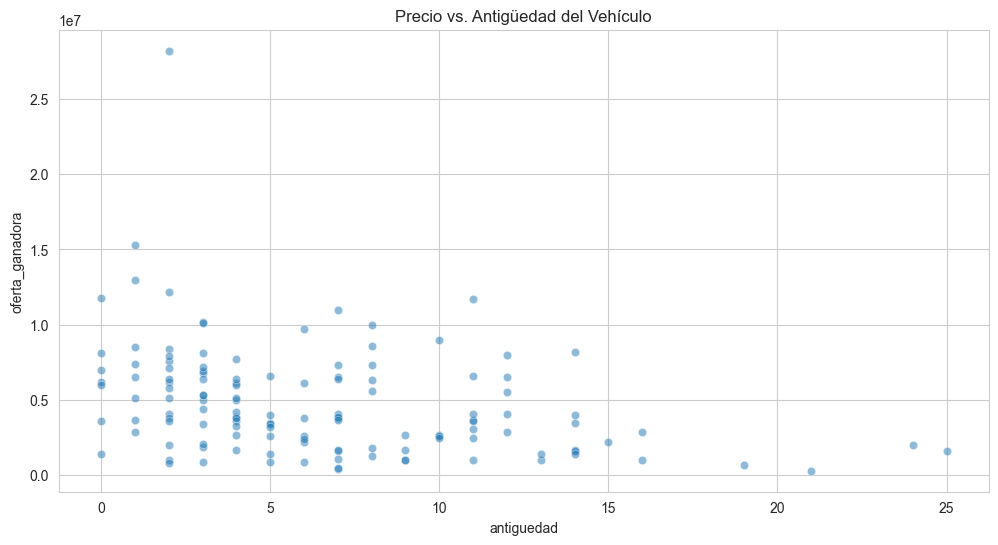

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Formatea los floats para que se muestren con separadores de miles y sin decimales

pd.options.display.float_format = lambda x: f'{x:,.0f}'.replace(',', '.')# Configuración de visualización
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar los DATOS PROCESADOS
try:
    # Fíjate que ahora la ruta apunta a la carpeta /processed
    df = pd.read_csv('../data/processed/karcal_data_processed.csv')
    print("Datos procesados cargados exitosamente.")
    df.info()
except FileNotFoundError:
    print("Error: Archivo no encontrado. Asegúrate de haber ejecutado el script 'data_cleaner.py' primero.")



# Ejemplo de EDA:
sns.scatterplot(data=df, x='antiguedad', y='oferta_ganadora', alpha=0.5)
plt.title('Precio vs. Antigüedad del Vehículo')
plt.show()



In [20]:
# Agrupar por marca y calcular estadísticas para 'oferta_ganadora'
tabla_por_marca = df.groupby('marca')['oferta_ganadora'].agg(['max', 'min', 'mean', 'median', 'count'])

# Ordenar por el precio máximo de forma descendente para ver las marcas más caras primero
tabla_por_marca_ordenada = tabla_por_marca.sort_values(by='max', ascending=False)

# Mostrar las 15 marcas principales
display(tabla_por_marca_ordenada.head(15))

,max,min,mean,median,count
marca,,,,,
VOLVO,28200000,28200000,28.200.000,28.200.000,1
HYUNDAI,15300000,1000000,6.557.143,4.100.000,7
FORD,13000000,2000000,7.040.000,7.700.000,5
DS,12200000,5000000,8.600.000,8.600.000,2
BMW,11800000,1000000,5.914.286,6.400.000,7
CHEVROLET,11000000,1400000,4.077.778,3.500.000,9
SUBARU,10200000,5000000,6.950.000,6.300.000,4
MITSUBISHI,10100000,2900000,7.420.000,7.900.000,5
MAZDA,9700000,1000000,4.000.000,3.300.000,5


In [16]:
# Agrupar por año y calcular las mismas estadísticas
tabla_por_año = df.groupby('año')['oferta_ganadora'].agg(['max', 'min', 'mean', 'count'])

# Ordenar por año de forma descendente para ver los más nuevos primero
tabla_por_año_ordenada = tabla_por_año.sort_values(by='año', ascending=False)

display(tabla_por_año_ordenada.head(15))

,max,min,mean,count
año,,,,
2025,11800000,1400000,"6,300,000",7
2024,15300000,2900000,"7,800,000",8
2023,28200000,800000,"6,887,500",16
2022,10200000,900000,"5,600,000",15
2021,7700000,1700000,"4,576,923",13
2020,6600000,900000,"3,200,000",8
2019,9700000,900000,"3,957,143",7
2018,11000000,400000,"4,000,000",13
2017,10000000,1300000,"5,842,857",7


In [17]:
# Primero, filtra por la marca que te interesa (ej. 'TOYOTA')
df_toyota = df[df['marca'] == 'TOYOTA']

# Ahora, agrupa los resultados de esa marca por modelo
tabla_modelos_toyota = df_toyota.groupby('modelo')['oferta_ganadora'].agg(['max', 'min', 'mean', 'count'])

# Ordena por precio promedio para ver qué modelo es, en promedio, más caro
tabla_modelos_toyota_ordenada = tabla_modelos_toyota.sort_values(by='mean', ascending=False)

display(tabla_modelos_toyota_ordenada)

,max,min,mean,count
modelo,,,,
NEW HI,6400000,6400000,"6,400,000",1
YARIS,4000000,4000000,"4,000,000",1


In [18]:
# Agrupar por tipo de transmisión
tabla_por_transmision = df.groupby('transmisión')['oferta_ganadora'].agg(['max', 'min', 'mean', 'median', 'count'])

display(tabla_por_transmision)

,max,min,mean,median,count
transmisión,,,,,
AUTOMATICA,28200000,700000,"6,239,623","6,000,000",53
MECANICA,10100000,300000,"3,840,260","3,600,000",77


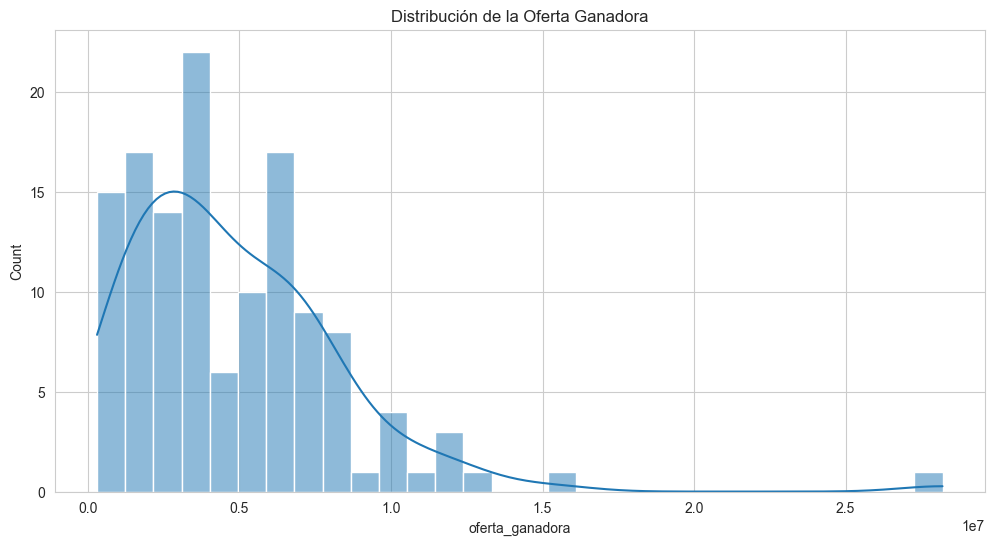

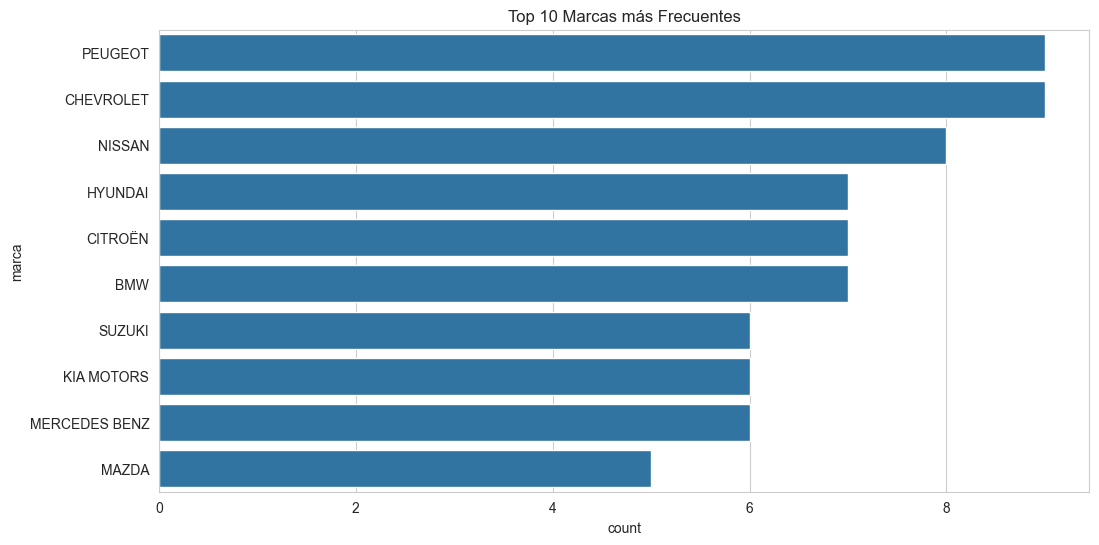

In [13]:
# Distribución del precio final (oferta ganadora)
sns.histplot(df['oferta_ganadora'], kde=True, bins=30)
plt.title('Distribución de la Oferta Ganadora')
plt.show()

# Conteo de autos por marca
sns.countplot(y=df['marca'], order=df['marca'].value_counts().index[:10])
plt.title('Top 10 Marcas más Frecuentes')
plt.show()

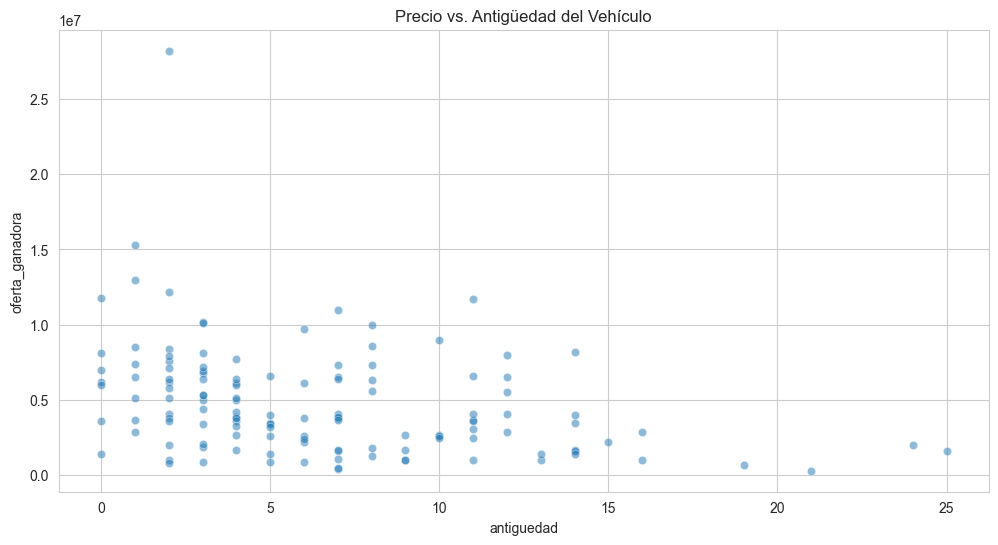

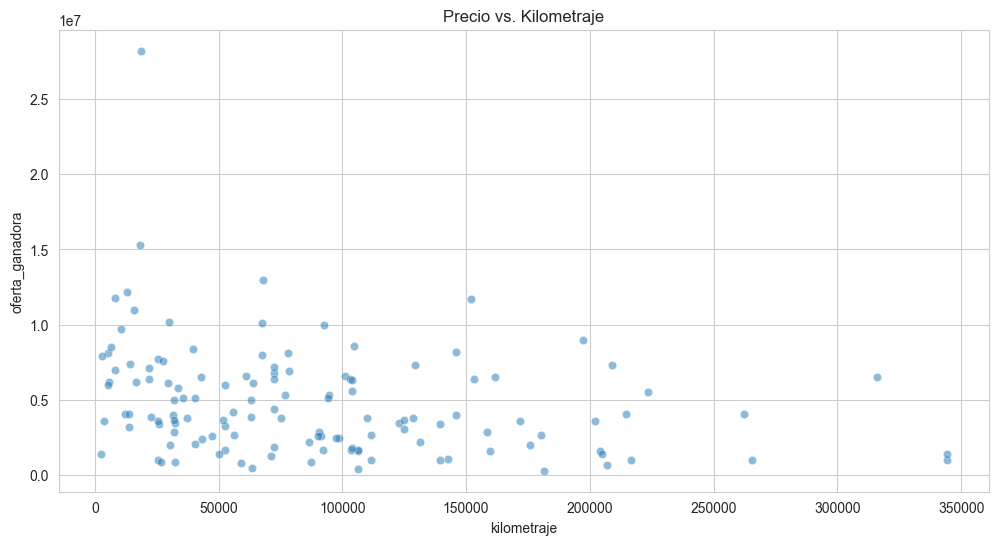

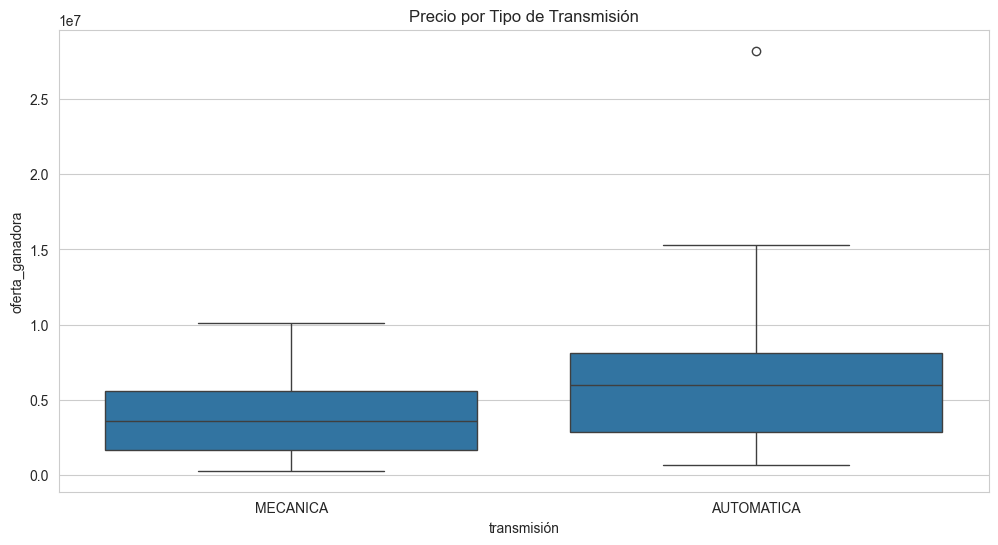

In [14]:
# Relación entre antigüedad y precio
sns.scatterplot(data=df, x='antiguedad', y='oferta_ganadora', alpha=0.5)
plt.title('Precio vs. Antigüedad del Vehículo')
plt.show()

# Relación entre kilometraje y precio
sns.scatterplot(data=df, x='kilometraje', y='oferta_ganadora', alpha=0.5)
plt.title('Precio vs. Kilometraje')
plt.show()

# Comparación de precios por tipo de transmisión
sns.boxplot(data=df, x='transmisión', y='oferta_ganadora')
plt.title('Precio por Tipo de Transmisión')
plt.show()

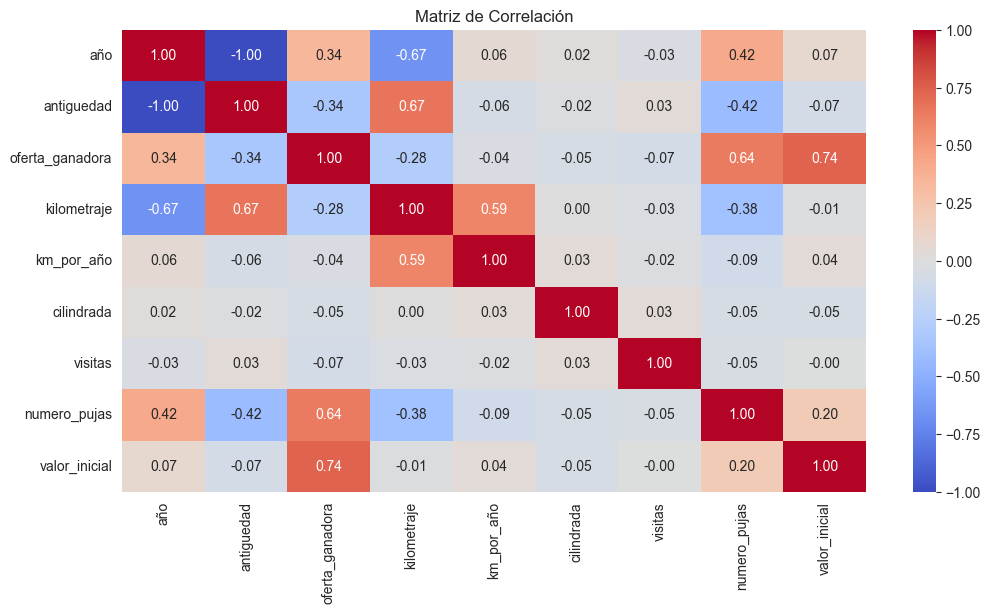

In [9]:
# Seleccionar solo columnas numéricas para la correlación
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Seleccionar características y objetivo
features = ['antiguedad', 'kilometraje', 'marca', 'transmisión', 'combustible', 'cilindrada', 'numero_pujas']
target = 'oferta_ganadora'

df_model = df.dropna(subset=features + [target])

X = df_model[features]
y = df_model[target]

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear un preprocesador para las columnas
numeric_features = ['antiguedad', 'kilometraje', 'cilindrada', 'numero_pujas']
categorical_features = ['marca', 'transmisión', 'combustible']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. Crear y entrenar el pipeline del modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

model.fit(X_train, y_train)

# 5. Evaluar el modelo
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nResultados del Modelo:")
print(f"Error Absoluto Medio (MAE): ${mae:,.0f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


Resultados del Modelo:
Error Absoluto Medio (MAE): $1,856,346
Coeficiente de Determinación (R²): 0.44


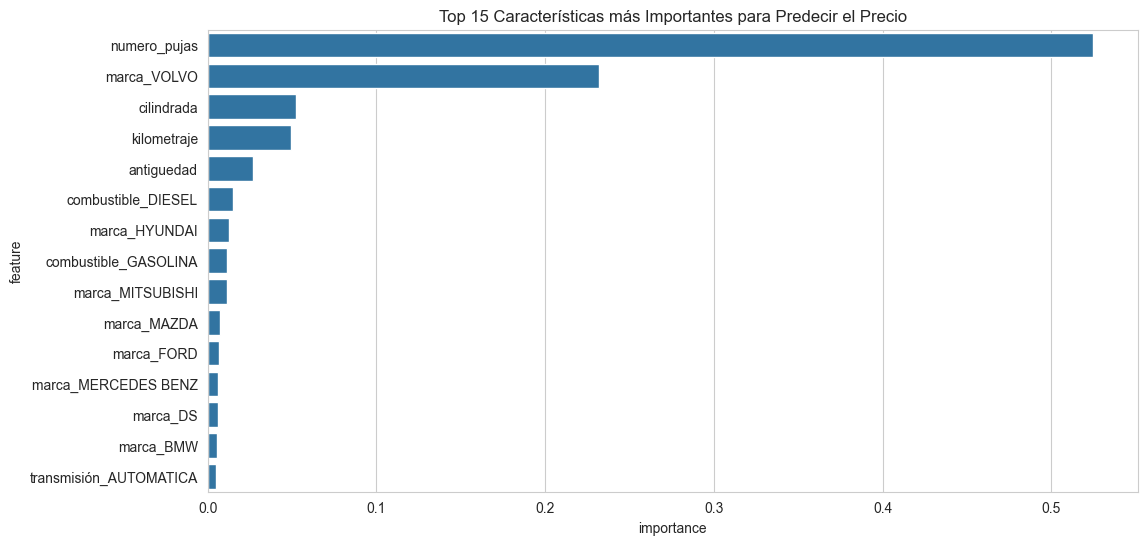

In [11]:
# Extraer nombres de las características después del OneHotEncoding
cat_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_names)

# Obtener importancias
importances = model.named_steps['regressor'].feature_importances_

# Crear un DataFrame de importancias
feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(15)

# Visualizar
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 15 Características más Importantes para Predecir el Precio')
plt.show()